# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data\Mouse_metadata.csv"
study_results_path = "data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_summary = pd.merge(mouse_metadata,study_results)
mouse_results_summary = mouse_results_summary[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen','Sex','Age_months','Weight (g)']]


# Display the data table for preview
mouse_results_summary.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [30]:
# Checking the number of mice.
number_mice = mouse_results_summary["Mouse ID"].nunique() 
print(number_mice)

249


In [34]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_results_summary[mouse_results_summary.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26


In [32]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = mouse_results_summary[mouse_results_summary.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

duplicate_mouse_data = mouse_results_summary[mouse_results_summary['Mouse ID'].isin(duplicate_mouse_ids)]

duplicate_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_results_summary = mouse_results_summary.drop_duplicates(subset=['Mouse ID'])
cleaned_mouse_results_summary.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
10,s185,0,45.0,0,Capomulin,Female,3,17
20,x401,0,45.0,0,Capomulin,Female,16,15
30,m601,0,45.0,0,Capomulin,Male,22,17
40,g791,0,45.0,0,Ramicane,Male,11,16


In [54]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = cleaned_mouse_results_summary['Mouse ID'].nunique()
print(unique_mice_count)

249


## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = mouse_results_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()

summary_stats.columns = ['Drug Regimen', 'Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)', 
                          'Variance', 'Standard Deviation', 'SEM']
summary_stats.head()

,Drug Regimen,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = mouse_results_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
).reset_index()

summary_stats.head()

,Drug Regimen,Mean,Median,Variance,Standard_Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

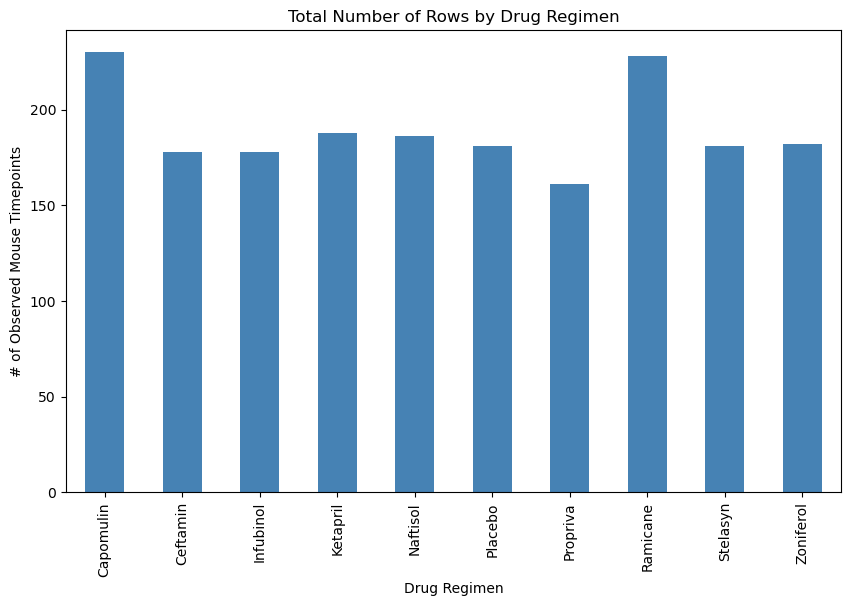

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = mouse_results_summary.groupby('Drug Regimen').size()  # Use .size() to count rows
bar_data.plot(kind='bar', figsize=(10, 6), color='steelblue')
plt.title('Total Number of Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

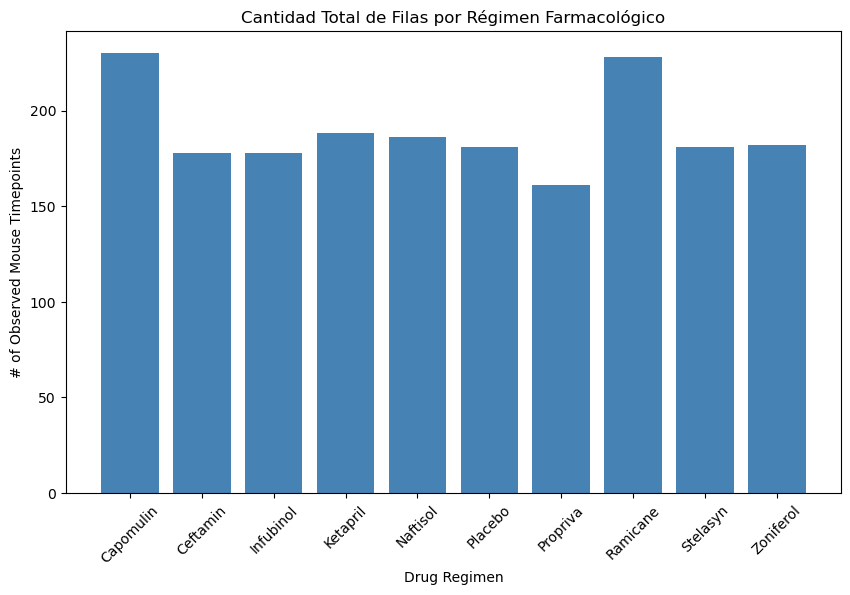

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_data = mouse_results_summary.groupby('Drug Regimen').size()  # Usar .size() para contar filas
plt.figure(figsize=(10, 6))
plt.bar(bar_data.index, bar_data.values, color='steelblue')  # Cambiar a azul oscuro
plt.title('Cantidad Total de Filas por Régimen Farmacológico')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:ylabel='Count'>

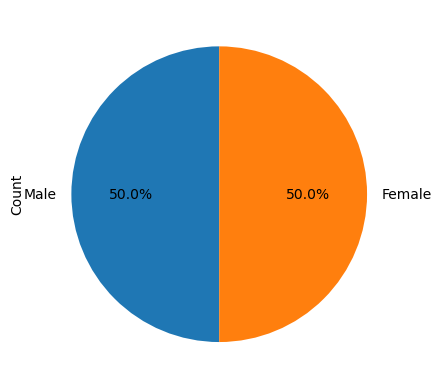

In [77]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
data = {'Count': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
        'Mouse ID': ['A1', 'B2', 'C3', 'D4', 'E5', 'F6']}
df = pd.DataFrame(data)
# Get the unique mice with their gender
gender_distribution = df['Count'].value_counts()

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)

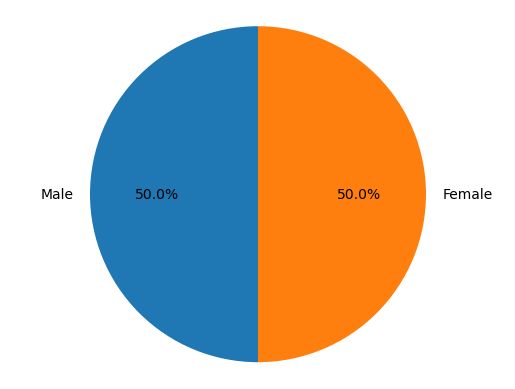

In [79]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_distribution = df['Count'].value_counts()
# Get the unique mice with their gender

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse
plt.show()
# Make the pie chart


## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = []

# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint_df = mouse_results_summary.loc[mouse_results_summary.groupby('Mouse ID')['Timepoint'].idxmax()]

# Start by getting the last (greatest) timepoint for each mouse
merged_data = pd.merge(mouse_results_summary, max_timepoint_df[['Mouse ID', 'Timepoint']], on=['Mouse ID', 'Timepoint'], how='inner')


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
for drug in selected_drugs:
   tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
   final_tumor_volumes.extend(tumor_volumes)

 #e quarty
quartiles = pd.Series(final_tumor_volumes).quantile([0.25, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
#
lower_bound = lowerq - 1.5 * iqr
upper_bound = upperq + 1.5 * iqr
#
outliers = [volume for volume in final_tumor_volumes if volume < lower_bound or volume > upper_bound]
#
print(f"Los cuartiles son: {quartiles}")
print(f"El rango intercuartílico (RIQ) es: {iqr}")
print(f"Los posibles valores atípicos son: {outliers}")

Los cuartiles son: 0.25    37.187744
0.75    59.930262
dtype: float64
El rango intercuartílico (RIQ) es: 22.742517952499995
Los posibles valores atípicos son: []


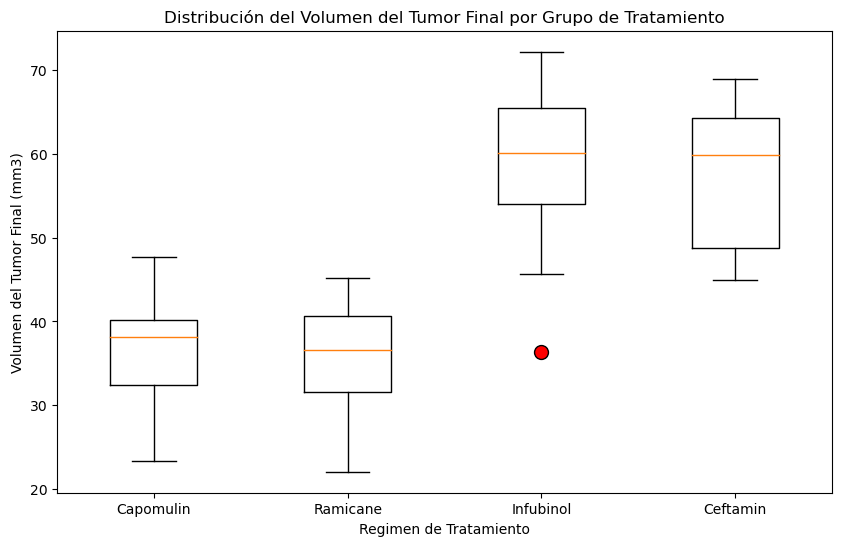

In [86]:
# Put treatments into a list for for loop (and later for plot labels)

data_dict = {drug: merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] for drug in selected_drugs}
# Create empty list to fill with tumor vol data (for plotting)

plt.figure(figsize=(10, 6))
plt.boxplot(data_dict.values(), labels=data_dict.keys(), flierprops=dict(marker='o', markerfacecolor='r', markersize=10))
# Calculate the IQR and quantitatively determine if there are any potential outliers.

plt.xlabel('Regimen de Tratamiento')
plt.ylabel('Volumen del Tumor Final (mm3)')
plt.title('Distribución del Volumen del Tumor Final por Grupo de Tratamiento')
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
plt.show()

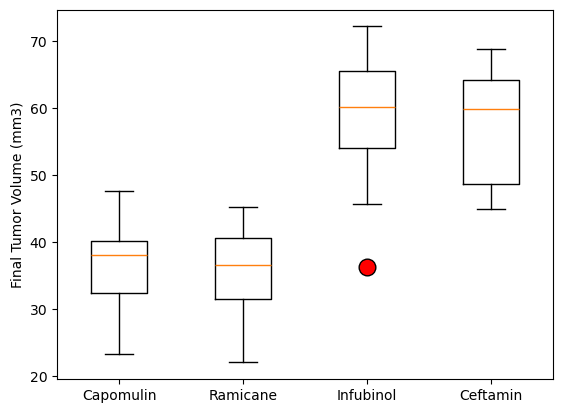

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

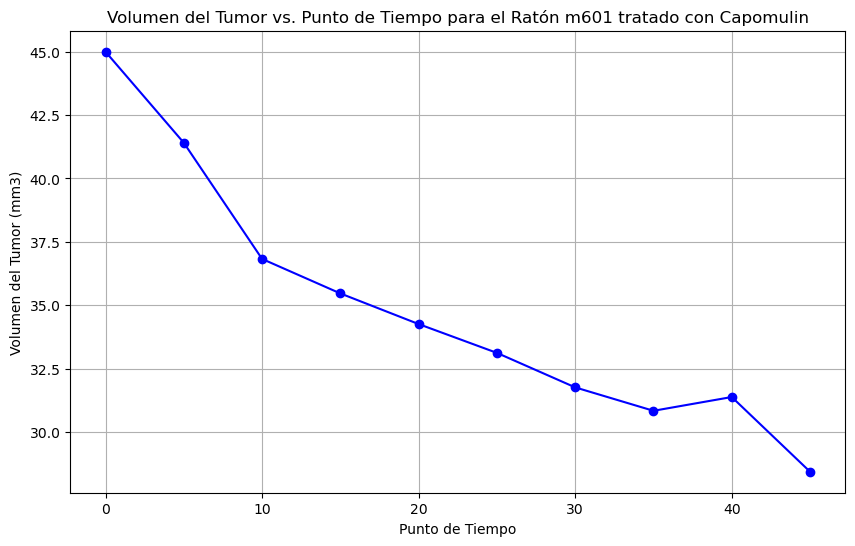

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'm601'
mouse_data = mouse_results_summary.loc[(mouse_results_summary['Drug Regimen'] == 'Capomulin') & (mouse_results_summary['Mouse ID'] == mouse_id)]
#
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
# 
plt.xlabel('Punto de Tiempo')
plt.ylabel('Volumen del Tumor (mm3)')
plt.title(f'Volumen del Tumor vs. Punto de Tiempo para el Ratón {mouse_id} tratado con Capomulin')
#
plt.grid(True)
plt.show()

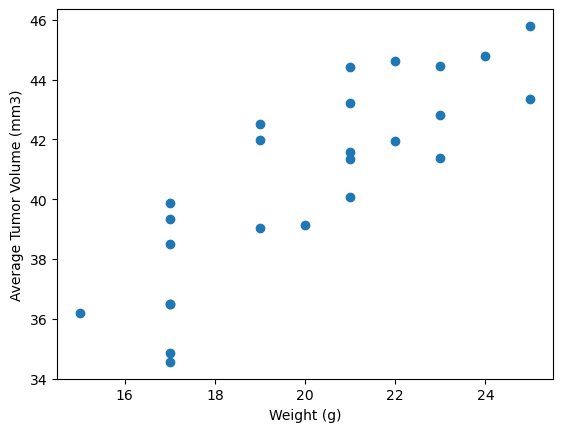

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


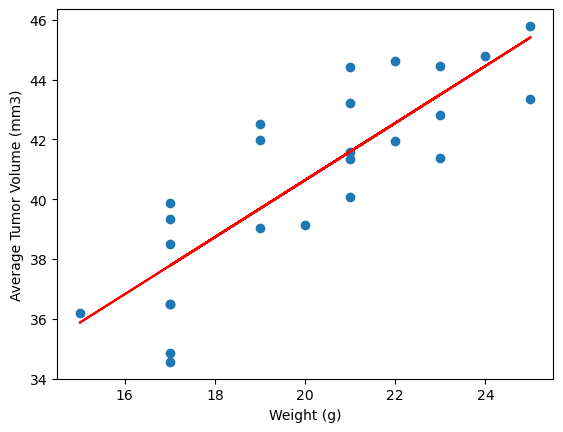

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
